<a href="https://colab.research.google.com/github/Seong-JiHyeon/Mini-Project/blob/master/USA%20corona19%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주제: 코로나 확진자 데이터와 비선형 회귀분석을 이용한 확진자 예측모델 생성 및 한국과 미국 비교

1. 데이터를 불러온다

In [ ]:
from google.colab import files
uploaded = files.upload()
data = 'US-KR.xlsx'

Saving US-KR.xlsx to US-KR.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel('US-KR.xlsx')
df.head()

,Country/Region,Korea,US
0,1/23/20,0,0
1,1/24/20,1,1
2,1/25/20,0,0
3,1/26/20,1,3
4,1/27/20,1,0


2. 데이터 개수

In [ ]:
df.count()

Country/Region    294
Korea             294
US                294
dtype: int64

3. 한국과 미국 일별 확진자 수를 그래프로 나타내어 비교

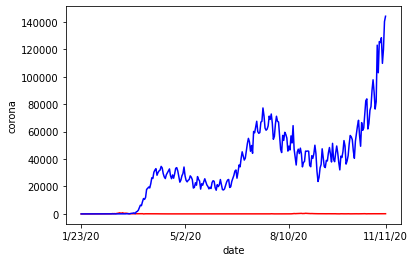

In [ ]:
import matplotlib.pyplot as plt

x = df['Country/Region']
y_korea = df['Korea']
y_us = df['US']

plt.xlabel('date')
plt.xticks([0, 100, 200, 293])
plt.ylabel('corona')

plt.plot(x, y_korea, color = 'red')
plt.plot(x, y_us, color = 'blue')
plt.show()

-> 미국의 확진자 수가 한국에 비해 너무 많아 한국은 거의 0에 가까운 선형으로 표현된다.

-> 미국의 확진자 수는 급격히 증가하는 추세를 보인다.

-> 한국은 미국에 비해 코로나 확산이 안정적으로 관리되고 있다.

4. 한국의 코로나 확진자 추이 그래프 상세 분석

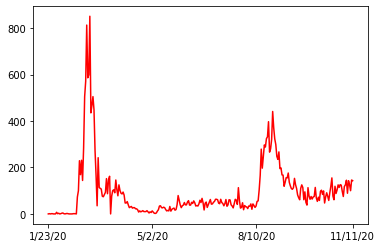

In [ ]:
plt.xticks([0, 100, 200, 293])
plt.plot(x, y_korea, color = 'red')

-> 코로나 발병 초반에 확진자가 급격히 치솟았다가 여름 동안 안전하게 관리되었다.

-> 하지만 10월부터 다시 확산 추세를 보이다가 잠시 주춤하였으나 11월 이후 다시 조금씩 증가 추세의 그래프가 나타난다

5. 비선형 회귀 모델 

* polynomial feature와 linear regression을 활용

In [ ]:
import numpy as np

#date 인덱스를 숫자로 치환
timeline = np.arange(0,294)[:, np.newaxis]
df['timeline'] = timeline

In [ ]:
df.head()

,Country/Region,Korea,US,timeline
0,1/23/20,0,0,0
1,1/24/20,1,1,1
2,1/25/20,0,0,2
3,1/26/20,1,3,3
4,1/27/20,1,0,4


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_feature = PolynomialFeatures(degree=2) #2차원 모델로 변형
X_poly = poly_feature.fit_transform(timeline)

In [ ]:
lin_reg = LinearRegression()  # LinearRegression 객체 생성
lin_reg.fit(X_poly, y_us)  # 회귀분석 실행 메소드
lin_fit = lin_reg.predict(X_poly)

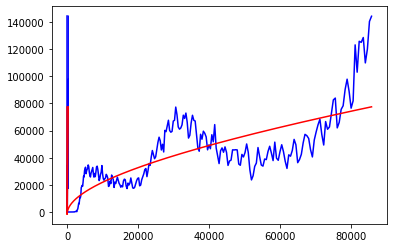

In [ ]:
plt.plot(X_poly, y_us, 'blue')
plt.plot(X_poly, lin_fit, 'r')  # predict한 결과를 그래프로 구현
plt.show()

In [ ]:
from sklearn.metrics import r2_score
l_r2 = r2_score(y_us, lin_fit)
l_r2

0.6872933790738466

In [ ]:
poly_feature = PolynomialFeatures(degree=5) #5차원 모델로 변형
X_poly = poly_feature.fit_transform(timeline)

In [ ]:
five_reg = LinearRegression()  # LinearRegression 객체 생성
five_reg.fit(X_poly, y_us)  # 회귀분석 실행 메소드
five_fit = five_reg.predict(X_poly)

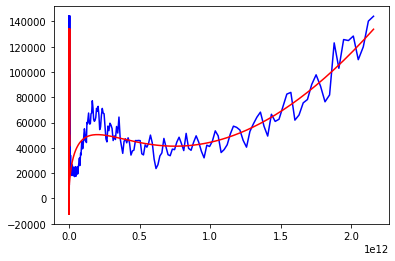

In [ ]:
plt.plot(X_poly, y_us, 'blue')
plt.plot(X_poly, five_fit, 'r')  # predict한 결과를 그래프로 구현
plt.show()

In [ ]:
f_r2 = r2_score(y_us, five_fit)
f_r2

0.8577202423829707

-> 그래프 모양도 유사해지고 정확도도 높아졌다.

-> 한국에 비해 그래프가 증가 형태로 단순하기 때문에 그래프 피팅이 잘 되었다.



---

* 텐서플로 케라스를 이용한 회귀 분석



In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df.head()

,Country/Region,Korea,US,timeline
0,1/23/20,0,0,0
1,1/24/20,1,1,1
2,1/25/20,0,0,2
3,1/26/20,1,3,3
4,1/27/20,1,0,4


In [ ]:
df.describe()

,Korea,US,timeline
count,294.000000,294.000000,294.000000
mean,95.037415,35374.918367,146.500000
std,122.132958,27630.353422,85.014705
min,0.000000,0.000000,0.000000
25%,27.000000,18977.000000,73.250000
50%,57.500000,32018.000000,146.500000
75%,113.000000,49793.750000,219.750000
max,851.000000,144133.000000,293.000000


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='softplus'),
    layers.Dense(64, activation='softplus'),
    layers.Dense(64, activation='softplus'),
    layers.Dense(64, activation='softplus'),
    layers.Dense(128, activation='softplus'),
    layers.Dense(128, activation='softplus'),
    layers.Dense(256, activation='softplus'),
    layers.Dense(256, activation='softplus'),
    layers.Dense(128, activation='softplus'),
    layers.Dense(128, activation='softplus'),
    layers.Dense(64, activation='softplus'),
    layers.Dense(64, activation='softplus'),
    layers.Dense(64, activation='softplus'),
    layers.Dense(64, activation='softplus'),

    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
EPOCHS = 2000
history = model.fit(
  df['timeline'], df['US'], epochs=EPOCHS, validation_split = 0.2)

Epoch 1/2000
8/8 [==============================] - 0s 26ms/step - loss: 1055994176.0000 - mae: 25527.7188 - mse: 1055994176.0000 - val_loss: 2313460480.0000 - val_mae: 39118.0117 - val_mse: 2313460480.0000
Epoch 2/2000
8/8 [==============================] - 0s 6ms/step - loss: 244923200.0000 - mae: 11689.9619 - mse: 244923200.0000 - val_loss: 678769536.0000 - val_mae: 19824.4668 - val_mse: 678769536.0000
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 138635072.0000 - mae: 9358.5498 - mse: 138635072.0000 - val_loss: 684178368.0000 - val_mae: 22148.3730 - val_mse: 684178368.0000
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 165337360.0000 - mae: 10244.7695 - mse: 165337360.0000 - val_loss: 865332352.0000 - val_mae: 26777.0352 - val_mse: 865332352.0000
Epoch 5/2000
8/8 [==============================] - 0s 6ms/step - loss: 154214032.0000 - mae: 9496.5205 - mse: 154214032.0000 - val_loss: 2139016064.0000 - val_mae: 42937.8320 - val_mse: 2

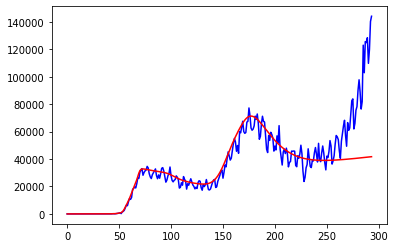

In [ ]:
df['prediction'] = model.predict(df['timeline'])

plt.plot(df['timeline'], df['US'], 'blue')
plt.plot(df['timeline'], df['prediction'], 'r')
plt.show()

In [ ]:
loss, mae, mse = model.evaluate(df['Korea'], df['prediction'])
print("테스트 세트의 평균 절대 오차: {:5.2f} ".format(mae))

10/10 [==============================] - 0s 3ms/step - loss: 1086894592.0000 - mae: 25918.3340 - mse: 1086894592.0000
테스트 세트의 평균 절대 오차: 25918.33 


-> 그래프의 끝 부분에서 예측 정확도가 떨어진다.

-> 미국의 경우 5차 함수를 이용한 회귀 분석의 정확도가 더 높다.